# Divvy Trips 2019-2020

# Case study: How does a bike-share navigate speedy success?
This project is part of the Google Data Analytics **Professional Certificate** course as a Capstone Project.

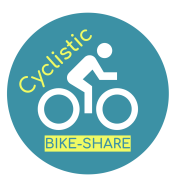

**SCENARIO**

**Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600
docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand
tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities
and riders who can’t use a standard two-wheeled bike. The majority of riders opt for
traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more
likely to ride for leisure, but about 30% use the bikes to commute to work each day.

The director of marketing (Moreno) believes the company’s future success depends on **maximizing the number of annual memberships**. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. 

Moreno has assigned you to answer the question: **How do annual members and casual
riders use Cyclistic bikes differently?**


In [55]:
library(tidyverse)
library(conflicted)
library(scales)

In [56]:
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Removing existing preference.
[conflicted] Will prefer dplyr::lag over any other package.


# PREPARE THE DATA (Upload)

In [57]:
q1_2019 <- read_csv("/kaggle/input/divvy-trips-19-20/Divvy_Trips_2019_Q-copy2 - Divvy_Trips_2019_Q1.csv")
q1_2020 <- read_csv("/kaggle/input/divvy-trips-19-20/Divvy_Trips_2020_Q1-copy2 - Divvy_Trips_2020_Q1.csv")


Rows: 365069 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): start_time, end_time, from_station_name, to_station_name, usertype...
dbl  (6): trip_id, bikeid, from_station_id, to_station_id, birthyear, day_of...
num  (1): tripduration
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 426887 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (7): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [58]:
#Comparing column names 
colnames(q1_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"        
[13] "ride_length"       "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

In [59]:
#Renaming to match the tables' columns
(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
                   ))


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear,ride_length,day_of_week
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<time>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,00:06:30,3
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,00:07:21,3
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,00:13:49,3
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,00:29:43,3
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,00:06:04,3
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983,00:03:36,3
21742449,2019-01-01 0:16:06,2019-01-01 0:19:03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984,00:02:57,3
21742450,2019-01-01 0:18:41,2019-01-01 0:20:21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990,00:01:40,3
21742451,2019-01-01 0:18:43,2019-01-01 0:47:30,6205,1727,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995,00:28:47,3


In [60]:
#Inspection
str(q1_2019)
str(q1_2020)


spc_tbl_ [365,069 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : chr [1:365069] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:365069] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member

In [62]:
# We need to convert ride_id and rideable_type to character so that they can stack correctly
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id),
                   rideable_type = as.character(rideable_type)) 


In [63]:
summary(q1_2019)

   ride_id           started_at          ended_at         rideable_type     
 Length:365069      Length:365069      Length:365069      Length:365069     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
  tripduration      start_station_id start_station_name end_station_id 
 Min.   :      61   Min.   :  2.0    Length:365069      Min.   :  2.0  
 1st Qu.:     326   1st Qu.: 76.0    Class :character   1st Qu.: 76.0  
 Median :     524   Median :170.0    Mode  :character   Median :168.0  
 Mean   :    1016   Mean   :198.1                       Mean   :198.6  
 3rd Qu.:     866   3rd Qu.:287.0                       3rd Qu.:287.0  
 Max.   :10628400   Max.   :6

In [64]:
# Let's stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(q1_2019, q1_2020)

In [66]:
# Remove lat, long, birthyear, and gender fields as this data was dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `start_lat` doesn't exist.


In [67]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<time>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,00:06:30,3
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,00:07:21,3
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,00:13:49,3
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,00:29:43,3
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,00:06:04,3
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,00:03:36,3


#  PROCESS: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS

In [68]:
#Inspect the data again
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics


[1] "ride_id"            "started_at"         "ended_at"          
 [4] "rideable_type"      "start_station_id"   "start_station_name"
 [7] "end_station_id"     "end_station_name"   "member_casual"     
[10] "ride_length"        "day_of_week"

[1] 791956

[1] 791956     11

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<time>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,00:06:30,3
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,00:07:21,3
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,00:13:49,3
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,00:29:43,3
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,00:06:04,3
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,00:03:36,3


tibble [791,956 × 11] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscr

   ride_id           started_at          ended_at         rideable_type     
 Length:791956      Length:791956      Length:791956      Length:791956     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_id start_station_name end_station_id  end_station_name  
 Min.   :  2.0    Length:791956      Min.   :  2.0   Length:791956     
 1st Qu.: 77.0    Class :character   1st Qu.: 77.0   Class :character  
 Median :174.0    Mode  :character   Median :174.0   Mode  :character  
 Mean   :204.4                       Mean   :204.4                     
 3rd Qu.:291.0          

**There are a few problems that I need to fix:**
*  (1) In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). I need to consolidate that from four to two labels.
* (2) The data can only be aggregated at the ride-level, which is too granular. So, I will add some additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
* (3) I will add a calculated field for length of ride since the all_trips data don't have it
* (4) There are some rides where tripduration shows up as negative, including several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. So, I will delete these rides.


* In the "member_casual" column, I'm gonna replace "Subscriber" with "member" and "Customer" with "casual"
* Before 2020, Divvy used different labels for these two types of riders ... we will want to make our dataframe consistent with their current nomenclature


In [69]:
# "Level" is a special property of a column that is retained even if a subset does not contain any values from a specific level
# Checking how many observations fall under each usertype
table(all_trips$member_casual)



    casual   Customer     member Subscriber 
     48480      23163     378407     341906 

In [70]:
# Reassign to the desired values (we will go with the current 2020 labels)
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

In [71]:
# Check to make sure the proper number of observations were reassigned
table(all_trips$member_casual)


casual member 
 71643 720313 

In [72]:
# Add columns that list the date, month, day, and year of each ride
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")


In [73]:
# Add a "ride_length" calculation to all_trips (in seconds)
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In [74]:
# Inspect the structure of the columns
str(all_trips)

tibble [791,956 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ rid

In [75]:
# Convert "ride_length" from Factor to numeric so I can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

In [76]:
# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
# I will create a new version of the dataframe (v2) since data is being removed
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

In [77]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,ride_length,day_of_week,date,month,day,year
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,member,390,Tuesday,2019-01-01,01,01,2019
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),member,441,Tuesday,2019-01-01,01,01,2019
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),member,829,Tuesday,2019-01-01,01,01,2019
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,member,1783,Tuesday,2019-01-01,01,01,2019
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,member,364,Tuesday,2019-01-01,01,01,2019
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,member,216,Tuesday,2019-01-01,01,01,2019


# ANALYSE: CONDUCT DESCRIPTIVE ANALYSIS

In [78]:
# Descriptive analysis on ride_length (all figures in seconds)
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride
summary(all_trips_v2$ride_length) #all of the above in a short code

[1] 1189.459

[1] 539

[1] 10632022

[1] 1

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      331      539     1189      912 10632022 

In [79]:
# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5372.7839
member,795.2523


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1393
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


In [80]:
# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


In [82]:
# Days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [83]:
# Now, I'm going to run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,4752.0504
member,Monday,822.3112
casual,Tuesday,4561.8039
member,Tuesday,769.4416
casual,Wednesday,4480.3724
member,Wednesday,711.9838
casual,Thursday,8451.6669


In [88]:
# Analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  	#creates weekday field using wday()
  group_by(member_casual, weekday) %>% 						#groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)							# sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5061.3044
casual,Mon,5591,4752.0504
casual,Tue,7311,4561.8039
casual,Wed,7690,4480.3724
casual,Thu,7147,8451.6669
casual,Fri,8013,6090.7373
casual,Sat,13473,4950.7708
member,Sun,60197,972.9383
member,Mon,110430,822.3112


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


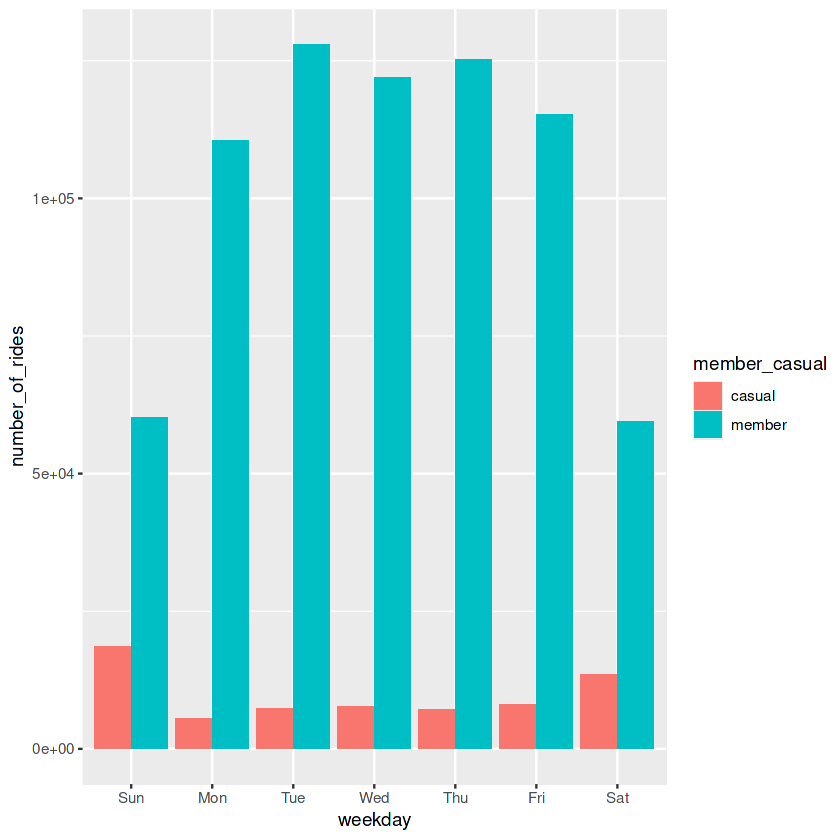

In [93]:
# Let's visualize the number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


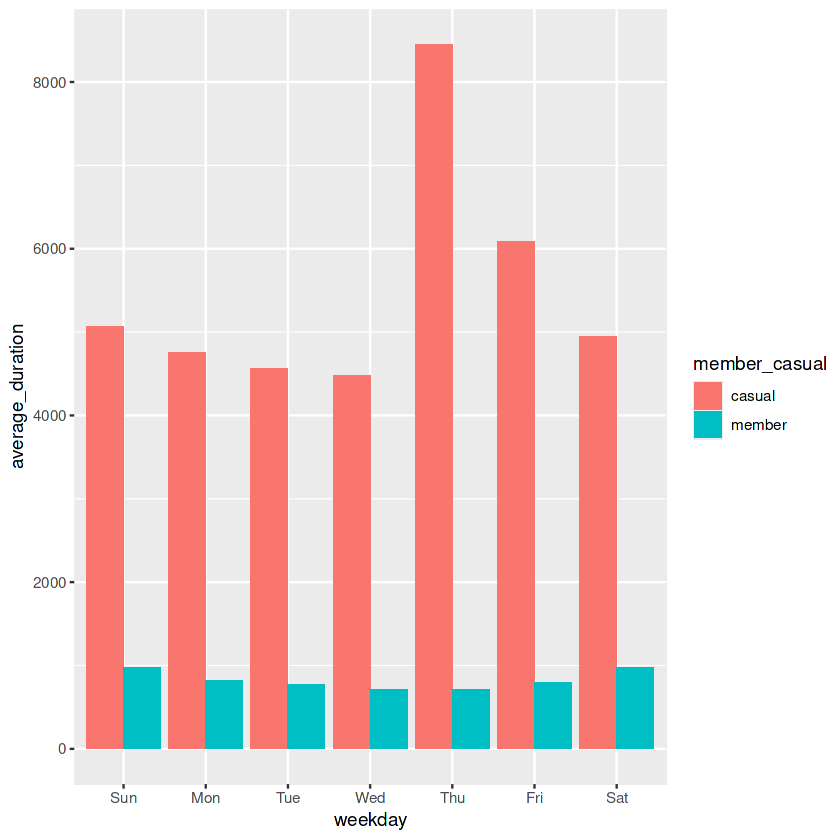

In [94]:
# Let's create a visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

# STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS

In [ ]:
# Create a csv file that we will visualize in Excel, Tableau, or my presentation software
# N.B.: This file location is for a Mac. If you are working on a PC, change the file location accordingly (most likely "C:\Users\YOUR_USERNAME\Desktop\...") to export the data. You can read more here: https://datatofish.com/export-dataframe-to-csv-in-r/
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'avg_ride_length.csv')
